In [1]:
import pandas as pd

data_karyawan = {
    'tinggi' : [168, 180, 173, 161, 175, 165, 180, 168, 158],
    'umur' : [25, 28, 22, 30, 30, 27, 32, 35, 24],
    'agama' : [
        'islam', 'kristen', 'islam', 'islam', 'kristen', 'islam', 'islam', 'islam', 'kristen'
    ]
}

data_karyawan_df = pd.DataFrame(data_karyawan)
data_karyawan_df

,tinggi,umur,agama
0,168,25,islam
1,180,28,kristen
2,173,22,islam
3,161,30,islam
4,175,30,kristen
5,165,27,islam
6,180,32,islam
7,168,35,islam
8,158,24,kristen


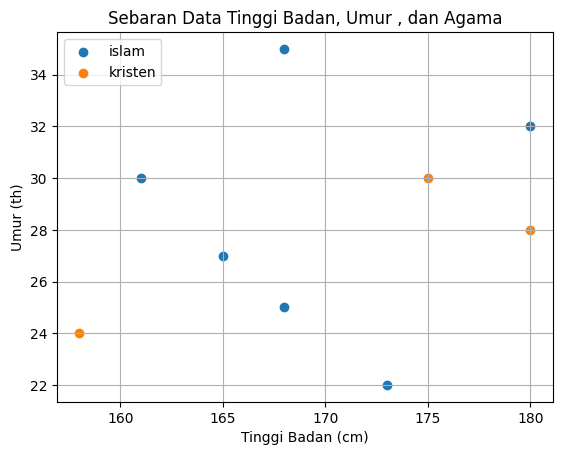

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for agama, d in data_karyawan_df.groupby('agama'):
    ax.scatter(d['tinggi'], d['umur'], label=agama)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Umur , dan Agama')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Umur (th)')
plt.grid(True)
plt.show()

In [3]:
import numpy as np

X_train = np.array(data_karyawan_df[['tinggi', 'umur']])
y_train = np.array(data_karyawan_df['agama'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[168  25]
 [180  28]
 [173  22]
 [161  30]
 [175  30]
 [165  27]
 [180  32]
 [168  35]
 [158  24]]

y_train: ['islam' 'kristen' 'islam' 'islam' 'kristen' 'islam' 'islam' 'islam'
 'kristen']


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


In [5]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 1 0 0 1 0 0 0 1]


In [6]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
tinggi_badan = 155
umur = 25
X_new = np.array([tinggi_badan, umur]).reshape(1, -1)
X_new

array([[155,  25]])

In [8]:
y_new = model.predict(X_new)



In [9]:
lb.inverse_transform(y_new)

array(['islam'], dtype='<U7')

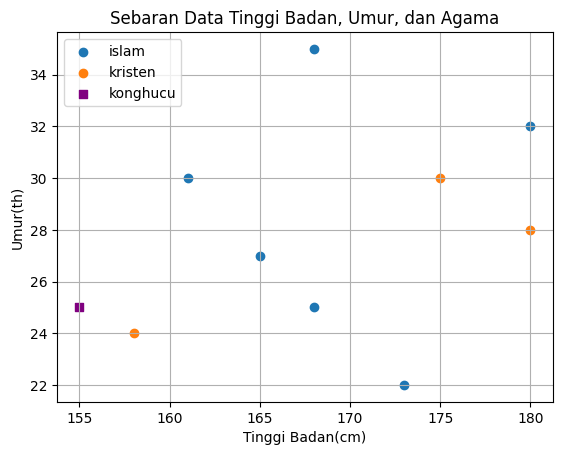

In [10]:
fig, ax = plt.subplots()
for agama, d in data_karyawan_df.groupby('agama'):
    ax.scatter(d['tinggi'], d['umur'], label=agama)

plt.scatter(tinggi_badan,
            umur,
            marker='s',
            color='purple',
            label='konghucu')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Umur, dan Agama')
plt.xlabel('Tinggi Badan(cm)')
plt.ylabel('Umur(th)')
plt.grid(True)
plt.show()

In [11]:
konghucu = np.array([tinggi_badan, umur])
konghucu

array([155,  25])

In [12]:
X_train

array([[168,  25],
       [180,  28],
       [173,  22],
       [161,  30],
       [175,  30],
       [165,  27],
       [180,  32],
       [168,  35],
       [158,  24]], dtype=int64)

In [13]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(konghucu, d) for d in X_train]
data_jarak


[13.0,
 25.179356624028344,
 18.24828759089466,
 7.810249675906654,
 20.615528128088304,
 10.198039027185569,
 25.96150997149434,
 16.401219466856727,
 3.1622776601683795]

In [14]:
data_karyawan_df['jarak'] = data_jarak
data_karyawan_df.sort_values(['jarak'])

,tinggi,umur,agama,jarak
8,158,24,kristen,3.162278
3,161,30,islam,7.810250
5,165,27,islam,10.198039
0,168,25,islam,13.000000
7,168,35,islam,16.401219
2,173,22,islam,18.248288
4,175,30,kristen,20.615528
1,180,28,kristen,25.179357
6,180,32,islam,25.961510


In [15]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['kristen', 'islam', 'islam', 'kristen'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[1 0 0 1]



In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


In [29]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred, zero_division=1)

print(f'Precission: {prec}')

Precission: 1.0


In [19]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.0


In [22]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.0


In [28]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred, zero_division=1)

print(f'Classfication Report:\n{cls_report}')

Classfication Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.75      0.50      0.33         4
weighted avg       0.75      0.50      0.33         4



In [27]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred, zero_division=1)

print(f'Precission: {prec}')

Precission: 1.0


In [25]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
